ROC, AUC, PR-Curves
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [15]:
import pandas as pd
from smartlawdata import getSentenceTypeDataSet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
df_final1 = getSentenceTypeDataSet()
#print(df_final1)

los=[]
for item in df_final1['text']:
    los.append(item)

#Create a TFIDF vectorizer to generate text entered into vector form to be given as input to Machine Learning model
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(los)
feature_names = vectorizer.get_feature_names_out() #Extract the feature names as columns for the texts
dense = vectors.todense()
denselist = dense.tolist()
df_end = pd.DataFrame(denselist, columns=feature_names)
df_end['argumentSentenceType']=df_final1['argumentSentenceType']

y=df_end.argumentSentenceType
X=df_end[feature_names]

In [16]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.linear_model import LogisticRegression

In [21]:
class_labels=y.unique()
y = label_binarize(y, classes=class_labels)
n_classes= y.shape[1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

print("(X,y) shape",X.shape,y.shape)

#classifier = OneVsRestClassifier(svm.SVC())
classifier = OneVsRestClassifier(LogisticRegression())

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 
import numpy as np
# Classification Report
y_pred = classifier.predict(X_test)

results = {}

results['confusion_matrix'] = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)).tolist()
print ("\n\nConfusion Matrix:\n",confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

results['classification_report'] = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1),digits=4,target_names=class_labels,output_dict=True)
model_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1),digits=4,target_names=class_labels)
print(model_report)

print(results)

AttributeError: 'numpy.ndarray' object has no attribute 'unique'



Confusion Matrix:
 [[2535    4    1]
 [ 149  243    0]
 [ 262    0   13]]
              precision    recall  f1-score   support

     PREMISE     0.8605    0.9980    0.9242      2540
  CONCLUSION     0.9838    0.6199    0.7606       392
          NA     0.9286    0.0473    0.0900       275

    accuracy                         0.8703      3207
   macro avg     0.9243    0.5551    0.5916      3207
weighted avg     0.8814    0.8703    0.8326      3207

{'confusion_matrix': [[2535, 4, 1], [149, 243, 0], [262, 0, 13]], 'classification_report': {'PREMISE': {'precision': 0.860488798370672, 'recall': 0.9980314960629921, 'f1-score': 0.9241706161137442, 'support': 2540}, 'CONCLUSION': {'precision': 0.9838056680161943, 'recall': 0.6198979591836735, 'f1-score': 0.76056338028169, 'support': 392}, 'NA': {'precision': 0.9285714285714286, 'recall': 0.04727272727272727, 'f1-score': 0.08996539792387544, 'support': 275}, 'accuracy': 0.870283754287496, 'macro avg': {'precision': 0.924288631652765, 'rec

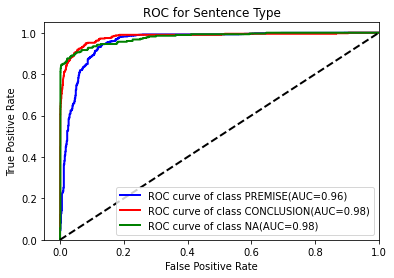

In [19]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0}(AUC={1:0.2f})'.format(class_labels[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Sentence Type')
plt.legend(loc="lower right")

resolution_value = 1200
plt.savefig("../temp/myImage.png", format="png", dpi=resolution_value)
plt.show()

In [20]:
feature_names.size

4891